In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon

In [2]:
df = pd.read_csv("raw.csv")
df

,Date,Round,Venue,Result,GF,GA,Opponent
0,2013-04-14,Regular Season,Away,D,1,1,Red Stars
1,2013-04-21,Regular Season,Away,L,1,2,Thorns
2,2013-04-26,Regular Season,Away,L,0,2,Kansas City
3,2013-05-04,Regular Season,Home,L,0,1,Kansas City
4,2013-05-11,Regular Season,Away,L,0,2,Sky Blue
...,...,...,...,...,...,...,...
221,2022-07-30,Regular Season,Away,W,3,2,Angel City
222,2022-08-02,Regular Season,Away,D,1,1,Louisville
223,2022-08-07,Regular Season,Home,L,1,2,Dash
224,2022-08-14,Regular Season,Home,W,4,1,Gotham FC


In [3]:
df["Diff"] = abs(df["GF"] - df["GA"])

In [4]:
df = df[["Date", "Result", "Diff"]]

In [5]:
w=12
h=19

In [6]:
colors = {
    "W": "#002d9e",
    "L": "#c70404",
    "D": "#bf8d31",
}

In [7]:
# Returns the orientation of the block given the x,y coorindates
# 0: Square is top left
# 1: Square is top right
# 2: Square is bottom right
# 3: Square is bottom left
def get_orientation(x, y):
    # Adjust for the second and third columns being offset
    if x >= 4 and x < 8:
        y += 2
    elif x >= 8 and x < 12:
        y += 1

    # Return orientation of block
    i = x % 4;
    j = y % 3;
    if (i == 0 and j == 1) or (i == 2 and j == 2):
        return 0
    elif (i == 1 and j == 1) or (i == 3 and j == 2):
        return 2
    elif (i == 0 and j == 2) or (i == 1 and j == 0) or (i == 2 and j == 1):
        return 3
    else:
        return 1

In [8]:
# Offsets to get the location of the square
square = {
    0: [0, 0.5],
    1: [0.5, 0.5],
    2: [0.5, 0],
    3: [0, 0],
}
# Offsets to get the location of the triangle
triangle = {
    0: [[0, 0], [1, 0], [1, 1]],
    1: [[0, 0], [1, 0], [0, 1]],
    2: [[0, 0], [0, 1], [1, 1]],
    3: [[1, 0], [0, 1], [1, 1]],
}

In [9]:
def add_lists(a, b):
    return list(map(sum, zip(a, b)))

<Figure size 432x288 with 0 Axes>

<Figure size 14400x22800 with 0 Axes>

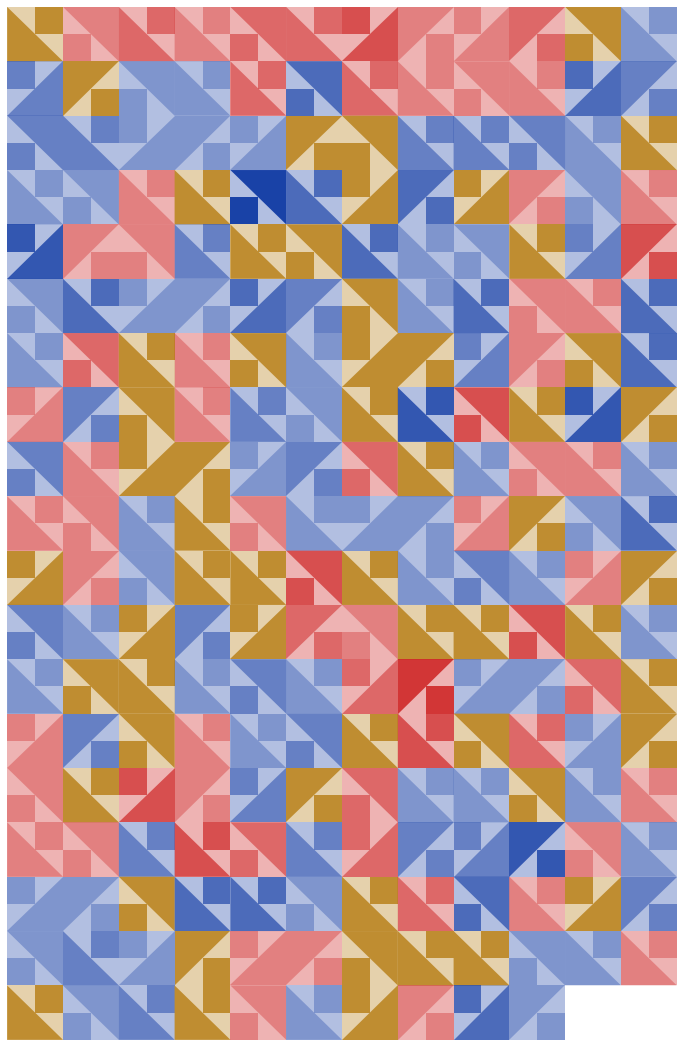

In [11]:
plt.clf()
plt.rcParams["figure.figsize"] = (w, h)
plt.figure(dpi=1200)
fig, ax = plt.subplots()
plt.xlim([0, w])
plt.ylim([0, h])
for j in range(0, h):
    for i in range(0, w):
        loc = j * w + i
        if loc >= len(df.index):
            continue
        o = get_orientation(i, j)
        res = df.iloc[loc]["Result"]
        color = colors[res]
        alpha = 1 if res == "D" else (df.iloc[loc]["Diff"]+1) / 7
        x = i
        y = h - j - 1
        # Draw background square
        ax.add_patch(Rectangle((x, y), 1, 1, color=color, alpha=0.4 if res == "D" else 0.3, ec=None))
        # Draw triangle
        ax.add_patch(
            Polygon([add_lists([x, y], t) for t in triangle[o]], color=color, alpha=alpha, ec=None)
        )
        # Draw small square
        ax.add_patch(
            Rectangle(add_lists([x, y], square[o]), 0.5, 0.5, color=color,alpha=alpha, ec=None)
        )

# Hide ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])
ax.set_xticks([])

# Save image
plt.savefig("reign_quilt.png", bbox_inches="tight", pad_inches=0.5)

<Figure size 540x288 with 0 Axes>

<Figure size 9000x4800 with 0 Axes>

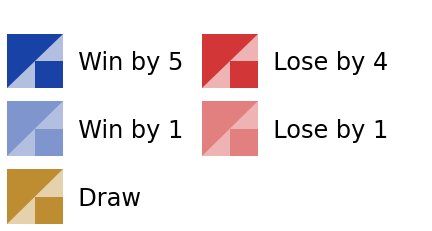

In [13]:
plt.clf()
plt.rcParams["figure.figsize"] = (7.5, 4)
plt.figure(dpi=1200)
fig, ax = plt.subplots()
plt.xlim([0, 7.5])
plt.ylim([0, 4])


def draw_demo(x, y, i):
    res = df.iloc[i]["Result"]
    color = colors[res]
    alpha = 1 if res == "D" else (df.iloc[i]["Diff"] + 1) / 7
    ax.add_patch(
        Rectangle((x, y), 1, 1, color=color, alpha=0.4 if res == "D" else 0.3, ec=None)
    )
    ax.add_patch(
        Polygon(
            [add_lists([x, y], t) for t in triangle[o]],
            color=color,
            alpha=alpha,
            ec=None,
        )
    )
    ax.add_patch(
        Rectangle(
            add_lists([x, y], square[o]), 0.5, 0.5, color=color, alpha=alpha, ec=None
        )
    )


# Win
draw_demo(0, 2.5, 40)
ax.text(1, 2.85, "  Win by 5", fontsize=24)
draw_demo(0, 1.25, 11)
ax.text(1, 1.6, "  Win by 1", fontsize=24)

# Draw
draw_demo(0, 0, 0)
ax.text(1, 0.35, "  Draw", fontsize=24)

# Loss
draw_demo(3.5, 1.25, 38)
ax.text(4.5, 1.6, "  Lose by 1", fontsize=24)
draw_demo(3.5, 2.5, 151)
ax.text(4.5, 2.85, "  Lose by 4", fontsize=24)

# Hide ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])
ax.set_xticks([])

# Save image
plt.savefig("reign_quilt_legend.png")